# **Technologies for Anti-Money Laundering and Financial Crime**
# Lab Exercise 6 - March 2025
### *COMP-1831-M01-2024-25*

Welcome to this lab exercise on unsupervised machine learning techniques for fraud detection. In today's session, you will be introduced to a fundamental concept in machine learning - unsupervised learning, and how it can be applied in the domain of fraud detection. Fraud is a critical issue in the financial industry, and detecting fraudulent activities is essential to protect businesses and customers from financial loss.


# Dataset

To start this lab session, we'll need to download the dataset into our notebook environment using a tool called gdown. This will allow us to access the data and begin exploring it using the unsupervised machine learning techniques we'll be learning today.

Link to dataset: https://drive.google.com/file/d/1qE58w_PEfg-qIICSX093eVK0Po6Pp0pW/view?usp=sharing

Recall that the exclamation mark (`!`) in front of a command indicates a bash command.

In [1]:
pip install --upgrade --no-cache-dir gdown

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\admin\Downloads\comp1831_lab_exercises\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
!gdown "1qE58w_PEfg-qIICSX093eVK0Po6Pp0pW"

^C


Downloading...
From (original): https://drive.google.com/uc?id=1qE58w_PEfg-qIICSX093eVK0Po6Pp0pW
From (redirected): https://drive.google.com/uc?id=1qE58w_PEfg-qIICSX093eVK0Po6Pp0pW&confirm=t&uuid=bf8a624a-f8a8-4a96-95ed-39df3babfe1e
To: c:\Users\admin\Downloads\comp1831_lab_exercises\CreditCardTxs_PCA_Dataset.zip

  0%|          | 0.00/69.2M [00:00<?, ?B/s]
  1%|          | 524k/69.2M [00:01<03:56, 291kB/s]
  2%|▏         | 1.05M/69.2M [00:03<04:01, 282kB/s]
  2%|▏         | 1.57M/69.2M [00:05<03:41, 305kB/s]
  3%|▎         | 2.10M/69.2M [00:06<03:25, 327kB/s]
  4%|▍         | 2.62M/69.2M [00:08<03:50, 288kB/s]
  5%|▍         | 3.15M/69.2M [00:10<03:42, 297kB/s]
  5%|▌         | 3.67M/69.2M [00:12<03:30, 312kB/s]
  6%|▌         | 4.19M/69.2M [00:13<03:26, 315kB/s]
  7%|▋         | 4.72M/69.2M [00:15<03:35, 299kB/s]
  8%|▊         | 5.24M/69.2M [00:17<03:22, 315kB/s]
  8%|▊         | 5.77M/69.2M [00:18<03:11, 331kB/s]
  9%|▉         | 6.29M/69.2M [00:19<03:04, 340kB/s]
 10%|▉         | 

⬅️ Your should be able to see a new file called `CreditCardTxs_PCA_Dataset.zip` in your file explorer.

Since this is a `zip` archive, go ahead and extract the csv dataset by running the command below:

In [ ]:
!unzip "CreditCardTxs_PCA_Dataset.zip"

## Description

The dataset we'll be using in this lab contains credit card transactions made by European cardholders in September 2013. This dataset covers two days and includes 492 frauds out of a total of 284,807 transactions, making it a highly unbalanced dataset where only 0.172% of transactions are fraudulent.

The dataset only includes numerical input variables that have been transformed using Principal Component Analysis (PCA). Due to confidentiality issues, the original features or any additional background information about the data is not provided. The principal components obtained through PCA are labeled as features V1, V2, ..., V28. However, the features that have not been transformed with PCA are 'Time' and 'Amount'.

**Time:** Indicates the time elapsed between each transaction and the first transaction in the dataset, while the

**Amount:**: Indicates the transaction amount. The 'Class' feature is the response variable, which takes the value 1 in the case of fraud and 0 otherwise.


# Part 1: PCA and EDA

# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is an **unsupervised** statistical technique used to transform a large set of variables into a smaller set of uncorrelated variables, known as principal components. It is often used as a data reduction technique to simplify complex datasets, while preserving most of the important information.

Let's consider an example dataset of sales data for a chain of stores. We have information about the sales of different products (e.g., groceries, electronics, clothing) for each store in the chain. We also have data on other factors that may influence sales, such as store location, size, and customer demographics. The dataset may have dozens or even hundreds of variables, making it difficult to analyze and interpret.

To apply PCA to this dataset, we would first standardize the data by subtracting the mean and dividing by the standard deviation. This ensures that all variables are on the same scale and have equal weight in the analysis.

Next, we calculate the covariance matrix, which measures the degree to which each variable is correlated with every other variable. The diagonal elements of the covariance matrix represent the variances of each variable, while the off-diagonal elements represent the covariances between pairs of variables.

The eigenvectors and eigenvalues of the covariance matrix are then calculated. The eigenvectors represent the directions in which the data vary the most, while the eigenvalues represent the amount of variance explained by each eigenvector. The eigenvectors are sorted in order of decreasing eigenvalue, and the first few eigenvectors (i.e., those with the highest eigenvalues) are retained as principal components.

These principal components are then used to transform the original dataset into a new set of variables that are uncorrelated with each other. This can simplify the dataset and make it easier to analyze. The new variables are linear combinations of the original variables, weighted by the eigenvectors.

Here's an example of how to perform PCA in Python using the popular scikit-learn library:

[0.72962445 0.22850762]


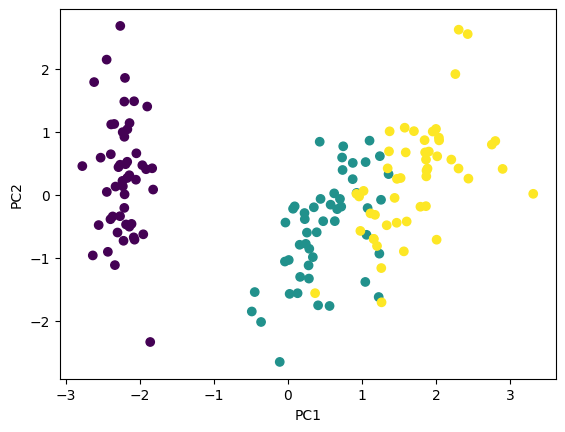

In [3]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X = iris.data

# Standardize the data
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

# Create a PCA object and fit the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Print the explained variance ratios of the principal components
print(pca.explained_variance_ratio_)

# Plot the transformed data
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In this example, we load the iris dataset, which contains measurements of the sepal length, sepal width, petal length, and petal width for three species of iris flowers. We standardize the data and then create a PCA object with two principal components. We fit the PCA model to the standardized data and transform the data using the fitted model. Finally, we plot the transformed data using the first two principal components.

The explained_variance_ratio_ attribute of the PCA object tells us the proportion of variance explained by each principal component. In this case, the first principal component explains **72.77%** of the variance, while the second principal component explains **23.03%** of the variance. Together, the two principal components explain 95.80% of the variance, which suggests that the original four variables are highly correlated.

![image.gif](https://i.stack.imgur.com/Q7HIP.gif)

For better understanding here is a very good visual explanation of PCA: https://setosa.io/ev/principal-component-analysis/

### PCA for Anonymization

If we were to remove the dimensionality reduction element of PCA, it would only perform a rotation of the original data space.

This property of PCA makes it useful for data masking and anonymisation. Although the original features cannot be provided due to confidentiality concerns, PCA allows us to preserve the distances between data points and maintain the structure of the original points. This means that the data remains useful for analysis purposes while protecting the privacy of individuals in the dataset.

This is why PCA was used in this dataset in the first place - to address the confidentiality concerns associated with the data.

### **Exercise 1.1: PCA on Wine dataset**
Use the code template below to perform PCA on the wine dataset provided by `sklearn.datasets`. Extract the first three principal components and print their explained variance ratios.

Use the first two principal components to display a scatter plot with color coded classes.




[0.36198848 0.1920749 ]


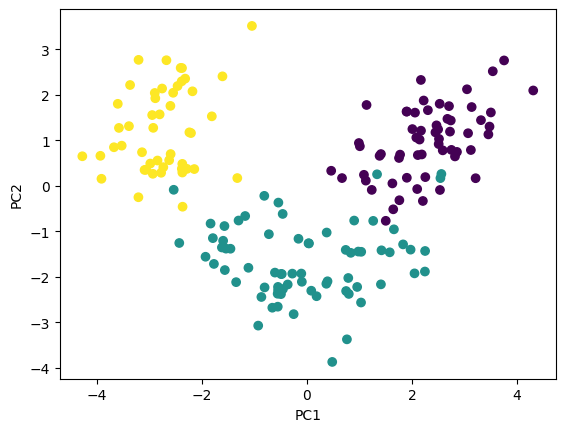

In [4]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

# Load the iris dataset
wine = load_wine()
X = wine.data

# Step 1: Standardize the data
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

# Create a PCA object and fit the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Print the explained variance ratios of the principal components
print(pca.explained_variance_ratio_)

# Plot the transformed data
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=wine.target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Fraud Detection with Unsupervised Learning


## Python code dependencies:

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

## Load Dataset

Let's go ahead and lead the CSV dataset as a DataFrame to starting working on our analysis.

In [ ]:
df = pd.read_csv("./creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis (EDA)

As always, it's important to understand the structure and content of the dataset we are working with so can proceed with a bery basic exploratory data analysis.

In [7]:
df.shape

(284807, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Class Imbalance
It's common in fraud detection to work with imbalanced datasets, thus we need to quantify how large the imbalance is.

Class
0    284315
1       492
Name: count, dtype: int64
Fraud cases are 0.17% of the dataset


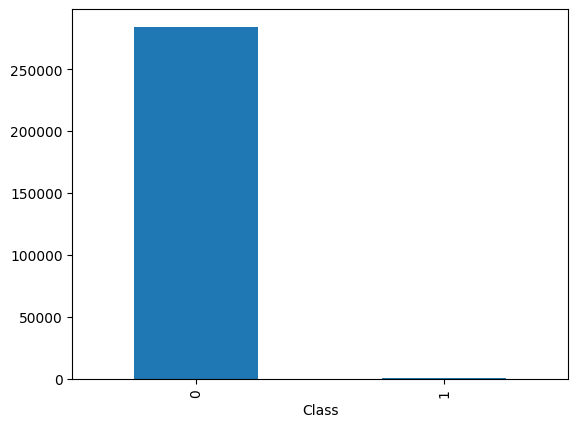

In [9]:
count_per_class = df.Class.value_counts()
count_per_class.plot(kind="bar")
print(count_per_class)
print("Fraud cases are {0:.2f}% of the dataset".format(count_per_class[1]/count_per_class[0]*100))

## Class over Time

As mentioned above, Time is one of the two features which has not been masked and therehore holds some semantic meaning. We can explore that further to see if there is a correlation with our `Class` label.

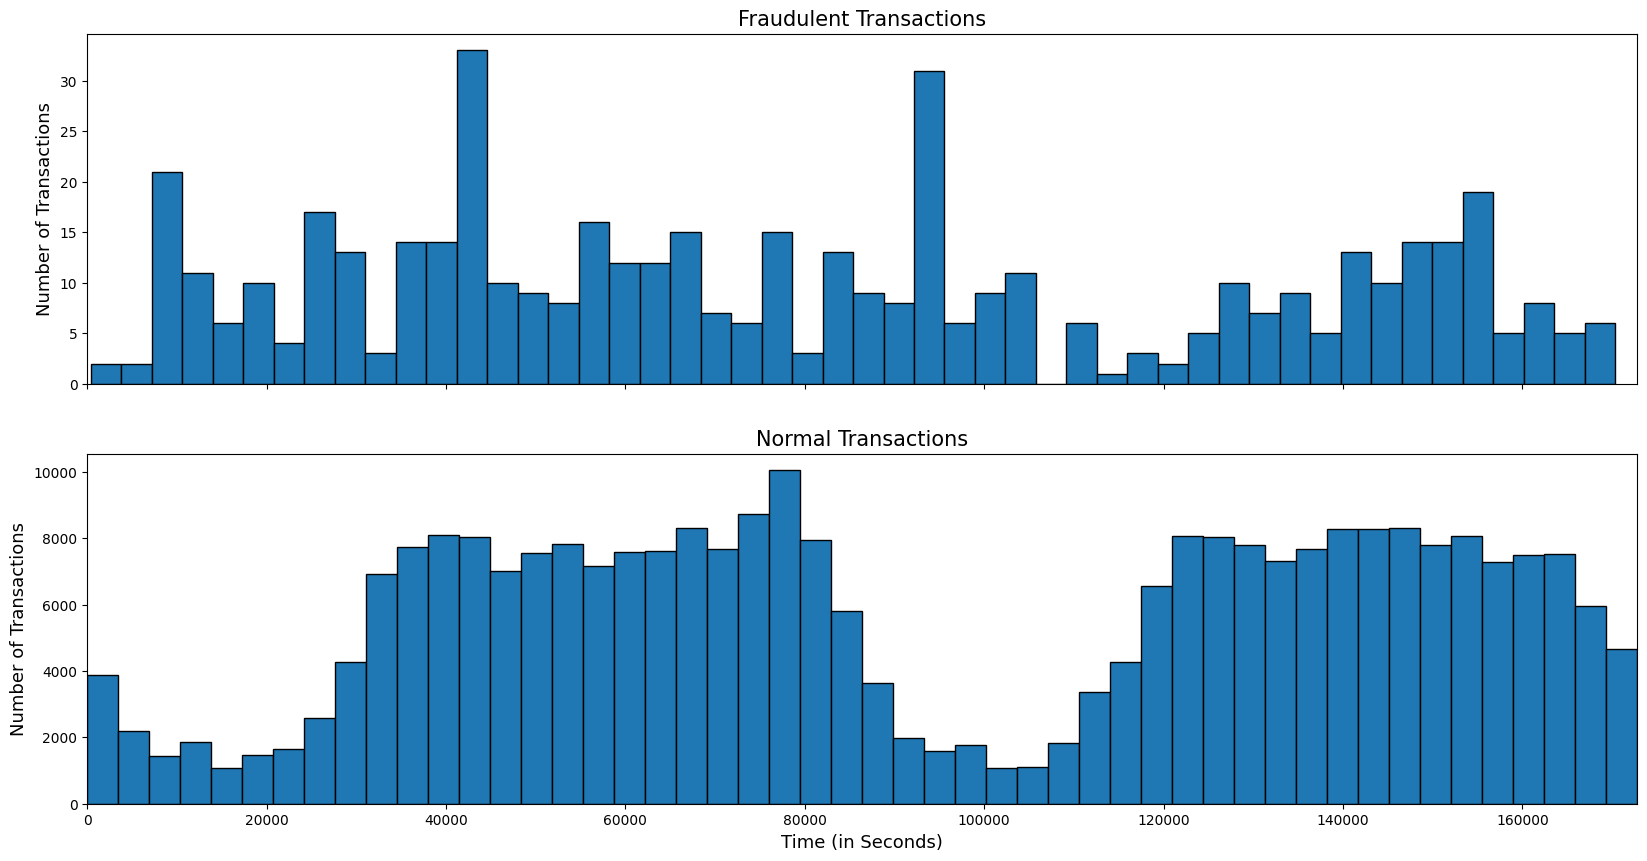

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20,10))

fraud_transactions = df.Time[df.Class == 1]
normal_transactions = df.Time[df.Class == 0]

ax1.hist(fraud_transactions, bins = 50, edgecolor="black")
ax1.set_xlim([min(fraud_transactions), max(fraud_transactions)])
ax1.set_title('Fraudulent Transactions', fontsize=15)
ax1.set_ylabel("Number of Transactions",  fontsize=13)

ax2.hist(normal_transactions, bins = 50, edgecolor="black")
ax2.set_xlim([min(normal_transactions), max(normal_transactions)])
ax2.set_title('Normal Transactions',  fontsize=15)

ax2.set_xlabel('Time (in Seconds)',  fontsize=13)
ax2.set_ylabel('Number of Transactions',  fontsize=13)

plt.show()

### Feature engineering

Create an "Hour" column which holds the hour in a 24 hour span

In [11]:
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Hour'] = (timedelta.dt.components.hours).astype(int)

## Exploring Correlation of the PCA components

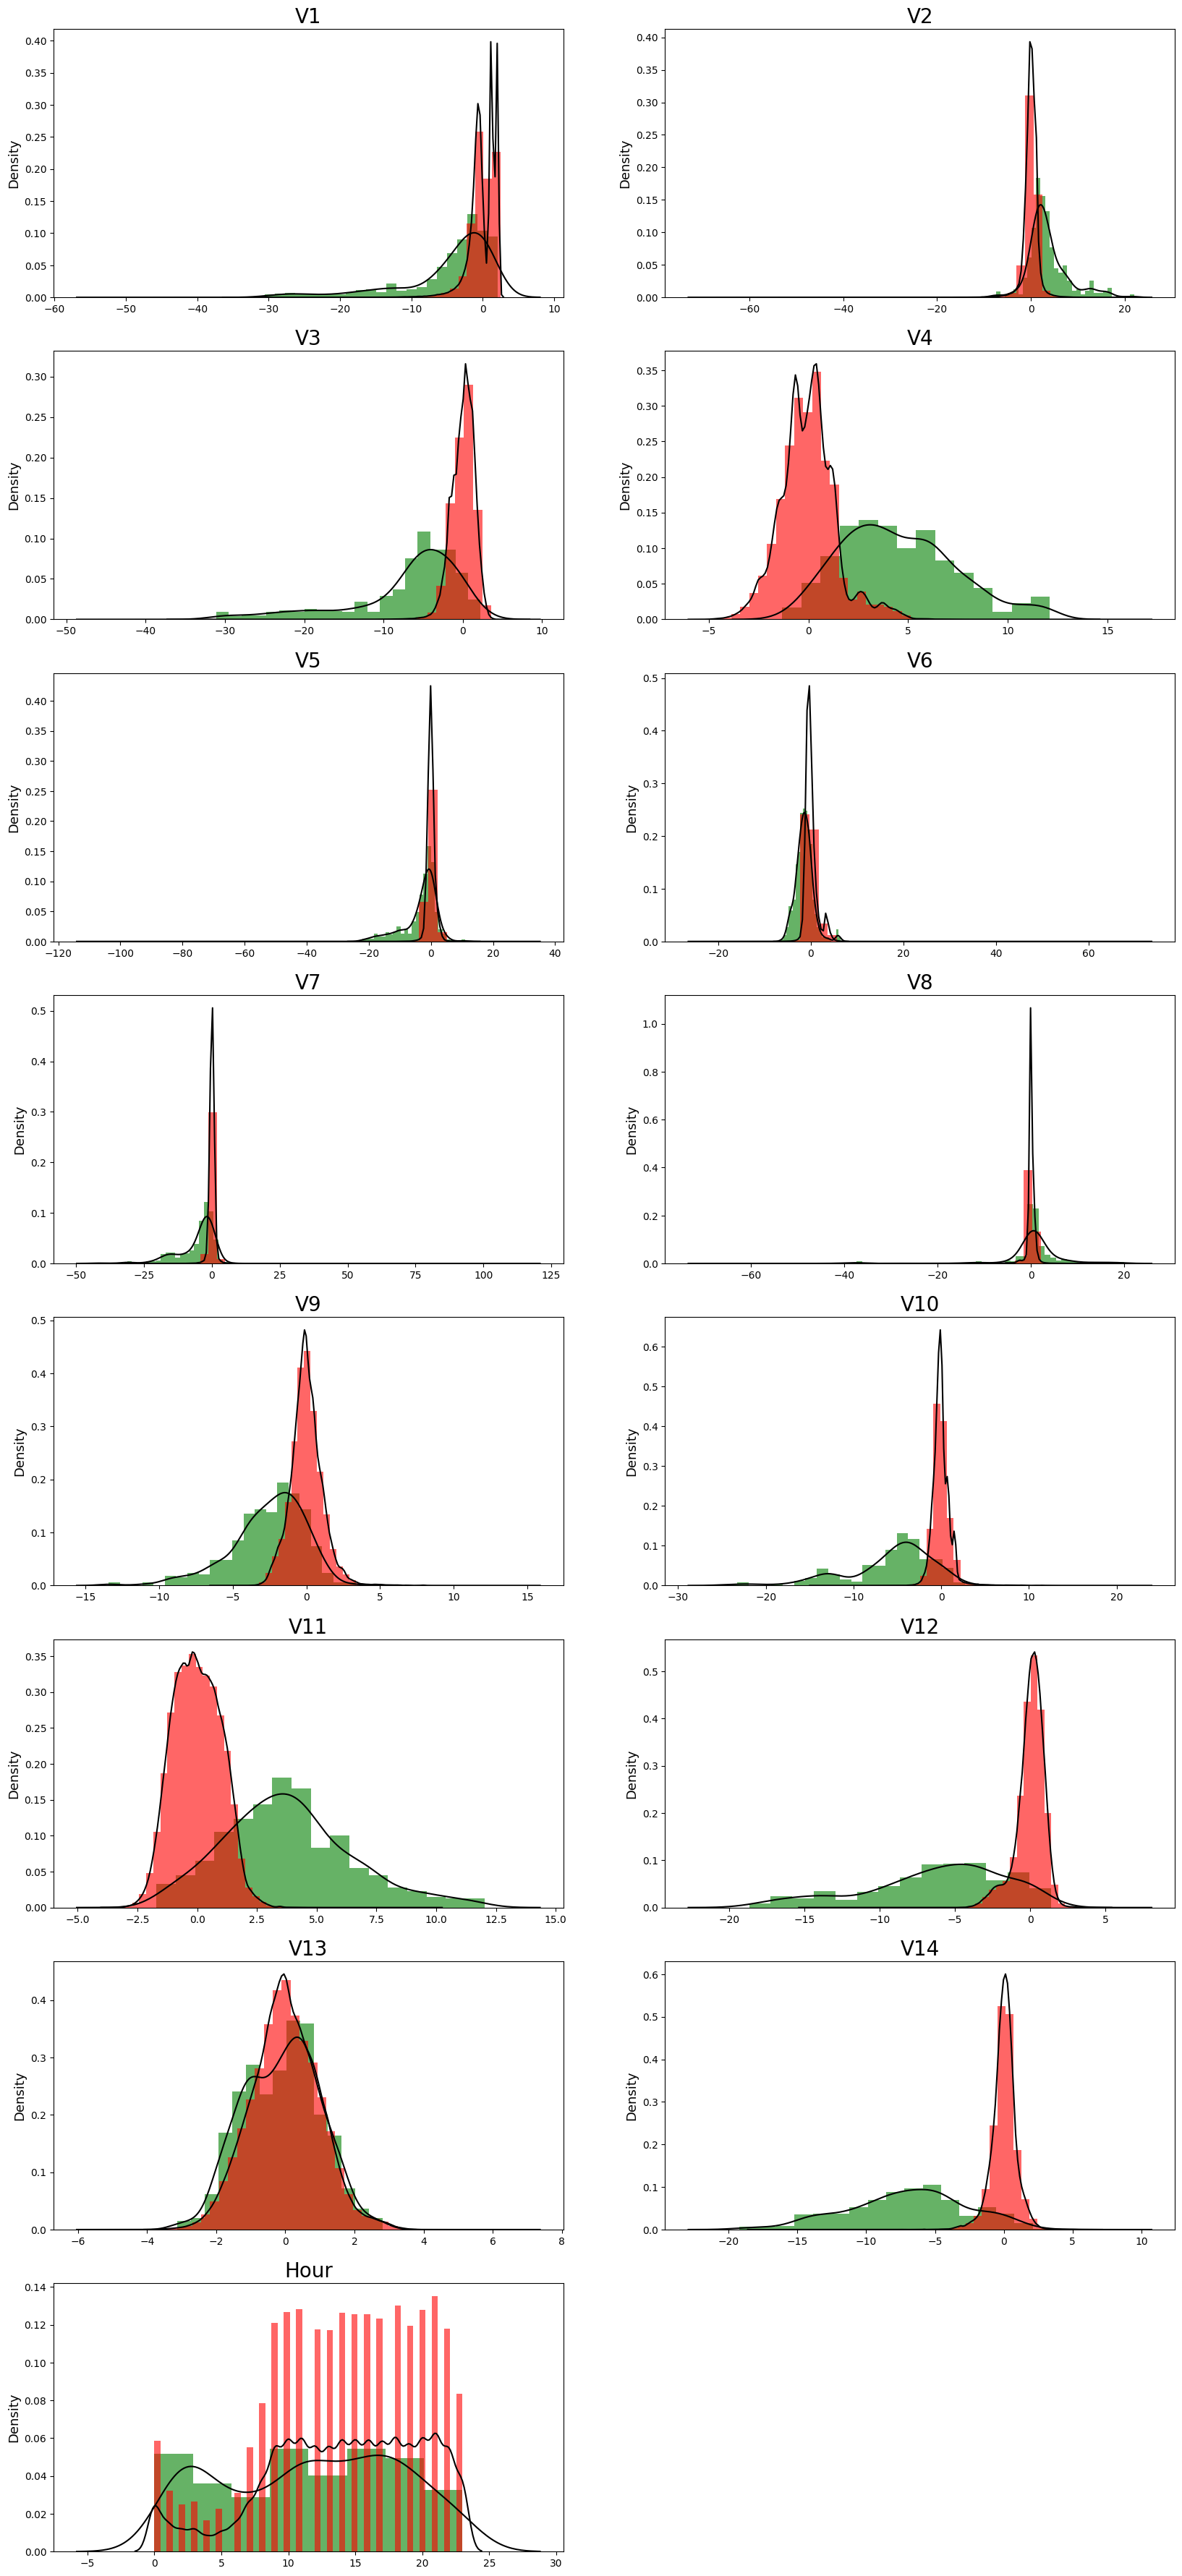

In [12]:
columns = list(df.iloc[:,1:15].columns) + ["Hour"]

frauds = df.Class == 1
normals = df.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(20,20*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][frauds], color='g', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=0.6))
    sns.distplot(df[col][normals],color='r', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=0.6))
    ax.set_ylabel('Density', fontsize=13)
    ax.set_title(str(col), fontsize=20)
    ax.set_xlabel('')
plt.show()

Some of the observed features exhibit a significant level of selectivity with regards to the distribution of the two distinct values of the dependent variable, "Class".

More precisely, V1, V2, V3, V4, V11, V12, and especially V14 features' distributions seem to differ with regards to the Class label value. As a result, they are considered good features for modelling.


### **Exercise 2.1**

In the above, section we've plotted histogram distributions for the first 14 features of the dataset. Plot the histogram distributions for the remaining features (V15-V28) and identify features that can be important for fraud classification.

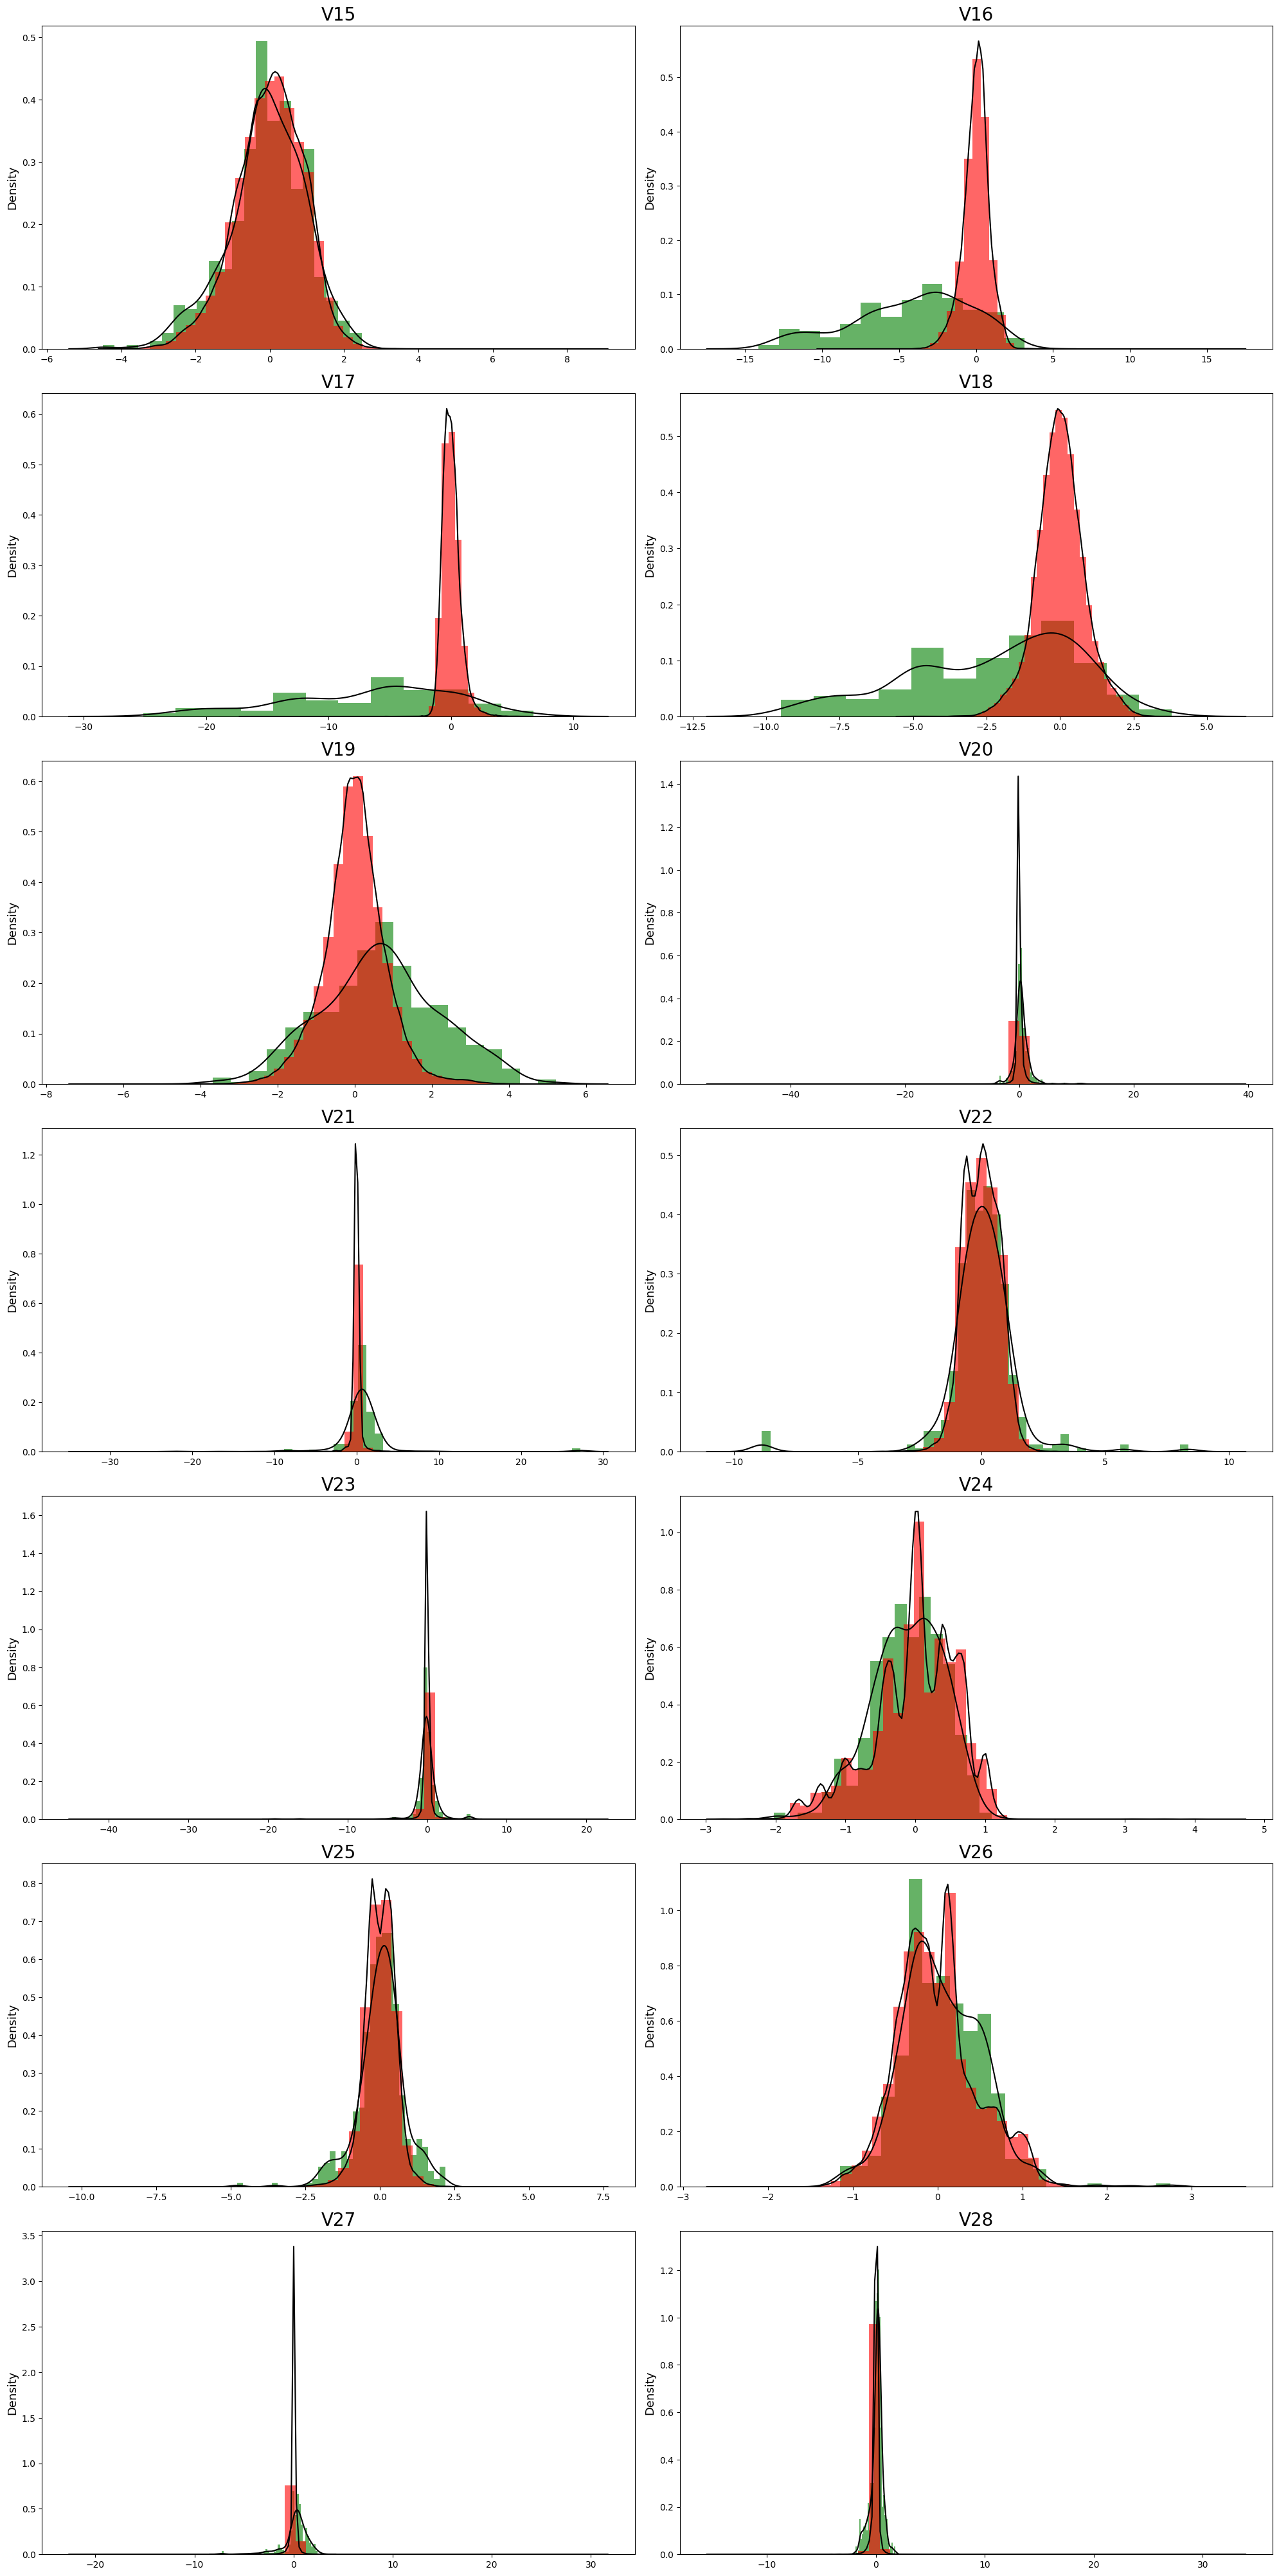

In [25]:
columns = [f"V{i}" for i in range(15, 29)]

frauds = df.Class == 1
normals = df.Class == 0

plt.figure(figsize=(20, 20*4))
grid = gridspec.GridSpec(14, 2)

for n, col in enumerate(columns):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][frauds], color='g', kde_kws={"color": "k", "lw": 1.5}, hist_kws=dict(alpha=0.6))
    sns.distplot(df[col][normals], color='r', kde_kws={"color": "k", "lw": 1.5}, hist_kws=dict(alpha=0.6))
    ax.set_ylabel('Density', fontsize=13)
    ax.set_title(str(col), fontsize=20)
    ax.set_xlabel('')
plt.tight_layout()
plt.show()

# Part 3: Modelling

## K-Means Clustering

K-means clustering is a popular technique in unsupervised machine learning used to group similar data points together. The algorithm works by taking a dataset and dividing it into k clusters, where k is a user-specified number of clusters.

The K-means algorithm starts by randomly selecting k points from the dataset to act as initial cluster centers. It then iteratively assigns each data point in the dataset to the nearest cluster center based on the Euclidean distance between the data point and the cluster center. Once all data points have been assigned to a cluster, the algorithm computes the new cluster centers as the mean of all the data points within that cluster.

The algorithm continues to iterate between assigning data points to clusters and computing new cluster centers until the clusters stop changing or a maximum number of iterations is reached. At the end of the algorithm, each data point belongs to one of the k clusters.

One important consideration when using K-means is choosing the value of k. This can be done using techniques such as the elbow method or silhouette analysis, which help to identify the optimal number of clusters based on the characteristics of the data.

![image.gif](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif?20170530143526)


Based on our preliminary significance analysis of the features, let's take the next step and identify a pair of significant features that can be used to classify transactions using clustering. With clustering we can identify natural groupings of transactions within the dataset, which in turn can help us better understand the underlying patterns and structures in the data. Using just a pair of features might not be an optimal choice but it will help us understand how the algorithm works by visualizing the results.

On top of that, let's see if the natural groupings that derived from the dataset features align with the corresponding Class of transactions.

In [17]:
def apply_kmeans_on_features(X, y):
  kmeans = KMeans(n_clusters=2, max_iter=3000, n_init=20)

  y_pred_kmeans = kmeans.fit_predict(X)
  accuracy = accuracy_score(y, y_pred_kmeans)
  print("{:.3f}%".format(accuracy*100))
  print(classification_report(y, y_pred_kmeans))
  return y_pred_kmeans

In [18]:
feature_pair = ['V14', 'V12']

X = df[feature_pair]
y = df[["Class"]]

y_pred_kmeans = apply_kmeans_on_features(X, y)

12.789%
              precision    recall  f1-score   support

           0       0.99      0.13      0.23    284315
           1       0.00      0.26      0.00       492

    accuracy                           0.13    284807
   macro avg       0.50      0.19      0.11    284807
weighted avg       0.99      0.13      0.23    284807



Interestingly with just two features V14 and V12 we can get accuracy (86%) with K-Means clustering.

**Note:** If accuracy is displayed as 13% this is because the KMeans algorithms is not really doing a semantic classification. Instead it just splits the dataset into two clusters and therefore in some cases the clusters corresponding to the classes are in reverse. To fix that we can just flip the cluster labels or just re-run K-Means.

Also recall that accuracy metric by itself is not sufficient to understand the performance of a model.

### Scatter plots - Original vs Predictions

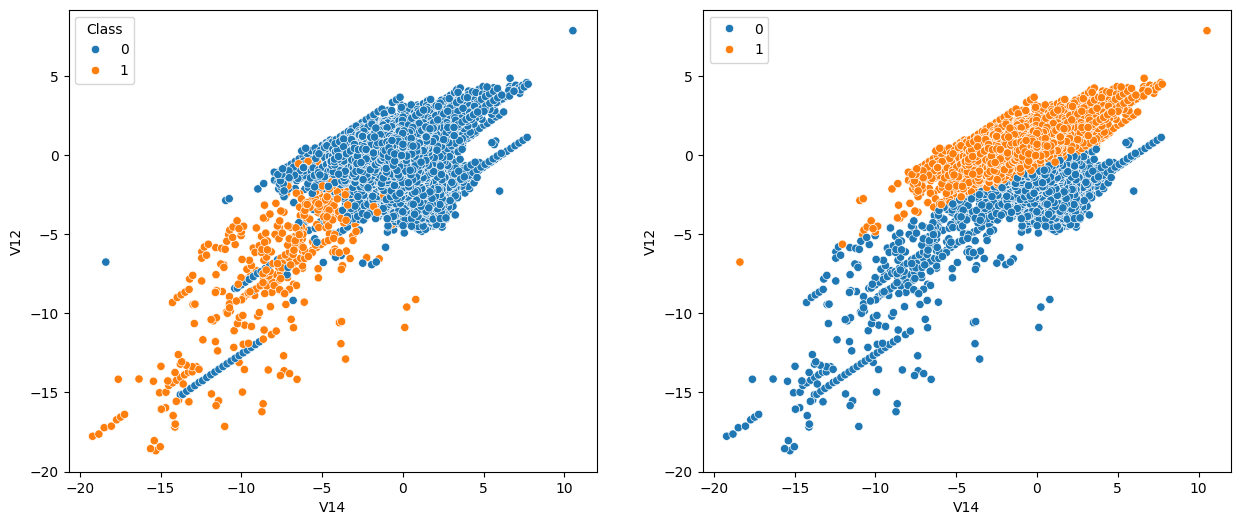

In [19]:
fig, ax =plt.subplots(1,2, figsize=(15, 6))
sns.scatterplot(x=X[feature_pair[0]], y=X[feature_pair[1]], hue=df['Class'], ax=ax[0])
sns.scatterplot(x=X[feature_pair[0]], y=X[feature_pair[1]], hue=y_pred_kmeans, ax=ax[1])
fig.show()

Let's apply the same clustering process but this time with a different pair of features (V11, V12). Based on our analysis above this pair should yield comparable results as well.

In [20]:
feature_pair = ['V11', 'V12']

X = df[feature_pair]
y = df[["Class"]]

y_pred_kmeans = apply_kmeans_on_features(X, y)

46.541%
              precision    recall  f1-score   support

           0       1.00      0.47      0.64    284315
           1       0.00      0.12      0.00       492

    accuracy                           0.47    284807
   macro avg       0.50      0.29      0.32    284807
weighted avg       1.00      0.47      0.63    284807



### Scatter plots - Original vs Predictions

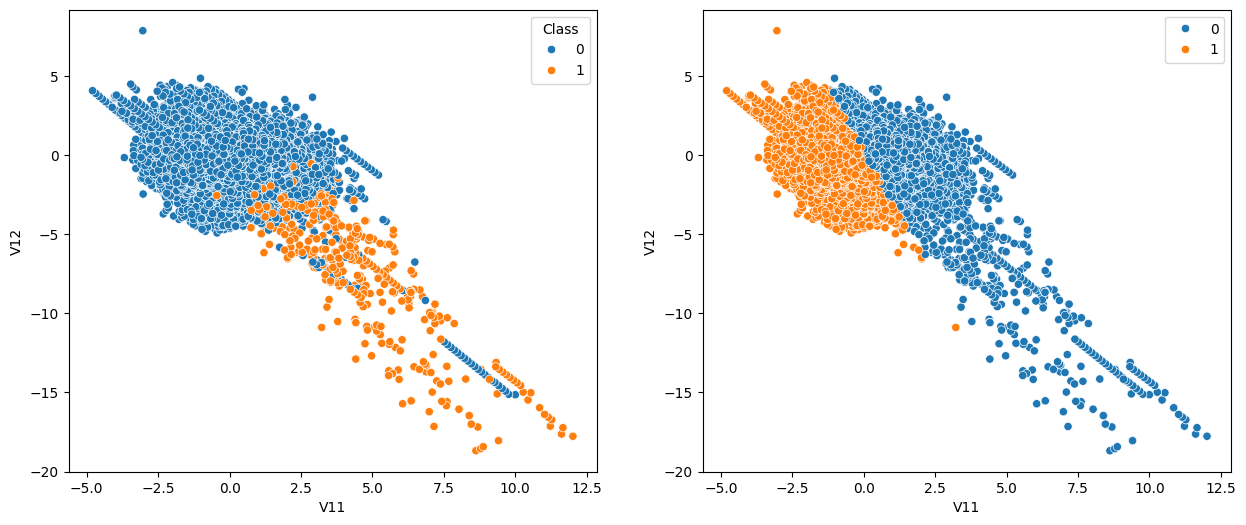

In [21]:
fig, ax =plt.subplots(1,2, figsize=(15, 6))
sns.scatterplot(x=X[feature_pair[0]], y=X[feature_pair[1]], hue=df['Class'], ax=ax[0])
sns.scatterplot(x=X[feature_pair[0]], y=X[feature_pair[1]], hue=y_pred_kmeans, ax=ax[1])
fig.show()

## Discussion
Unfortunately, the accuracy level we observed for this new pair of features (which we thought would be similar to the previous pair V12, V14) is actually quite low. As we can see from the scatter plots, the K-means algorithm did not split the clusters very well. One reason for this is that K-means assumes that the dataset classes are balanced, which is not the case for our current dataset.

To address this class imbalance issue, we will employ a technique called Synthetic Minority Oversampling TEchnique (SMOTE), which we learned about in a previous lab. SMOTE is a powerful technique that can help us balance our dataset by generating synthetic samples for the minority class. By doing so, we can improve the accuracy of our models and obtain more meaningful insights from our data. Let's go ahead and apply SMOTE to our dataset and see if it can help us improve our clustering results!

## Tackle class imbalance with SMOTE

In [22]:
print(f'Original dataset shape : {y.value_counts()}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {y_res.value_counts()}')

Original dataset shape : Class
0        284315
1           492
Name: count, dtype: int64
Resampled dataset shape Class
0        284315
1        284315
Name: count, dtype: int64


In [23]:
y_pred_kmeans = apply_kmeans_on_features(X_res, y_res)

78.786%
              precision    recall  f1-score   support

           0       0.70      1.00      0.82    284315
           1       1.00      0.58      0.73    284315

    accuracy                           0.79    568630
   macro avg       0.85      0.79      0.78    568630
weighted avg       0.85      0.79      0.78    568630



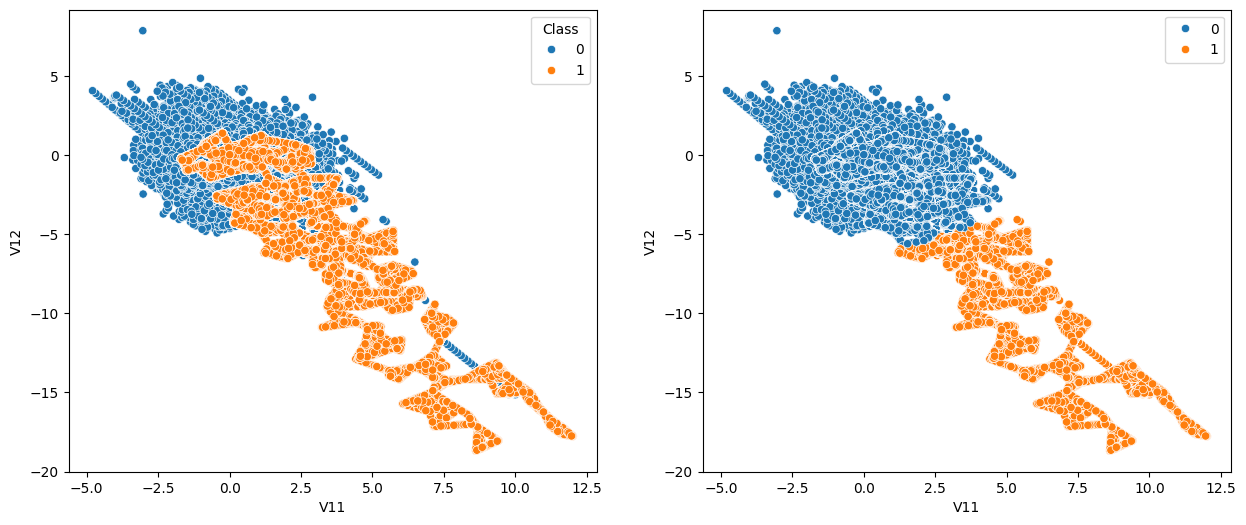

In [24]:
fig, ax =plt.subplots(1,2, figsize=(15, 6))
sns.scatterplot(x=X_res[feature_pair[0]], y=X_res[feature_pair[1]], hue=y_res.Class, ax=ax[0])
sns.scatterplot(x=X_res[feature_pair[0]], y=X_res[feature_pair[1]], hue=y_pred_kmeans, ax=ax[1])
fig.show()


### **Exercise 3.1: K-Means clustering**

Taking into consideration the feature analysis performed in exercise 2.1, use another pair of features (V1-V28) to run k-means clustering and perform predictions. Justify your feature pair decision and evaluate your predictions accuracy.

For the same feature pair, run SMOTE on the dataset and re-run K-means clustering, perform predictions and re-evaluate the accuracy.

Explain any differences in the classification report.

Original Dataset:
Original dataset shape: Class
0        284315
1           492
Name: count, dtype: int64

K-Means Clustering without SMOTE:
Accuracy: 0.4957392198927695
              precision    recall  f1-score   support

           0       1.00      0.50      0.66    284315
           1       0.00      0.29      0.00       492

    accuracy                           0.50    284807
   macro avg       0.50      0.39      0.33    284807
weighted avg       1.00      0.50      0.66    284807


After SMOTE:
Resampled dataset shape: Class
0        284315
1        284315
Name: count, dtype: int64

K-Means Clustering with SMOTE:
Accuracy: 0.593825510437367
              precision    recall  f1-score   support

           0       0.55      1.00      0.71    284315
           1       0.98      0.19      0.32    284315

    accuracy                           0.59    568630
   macro avg       0.77      0.59      0.52    568630
weighted avg       0.77      0.59      0.52    568630



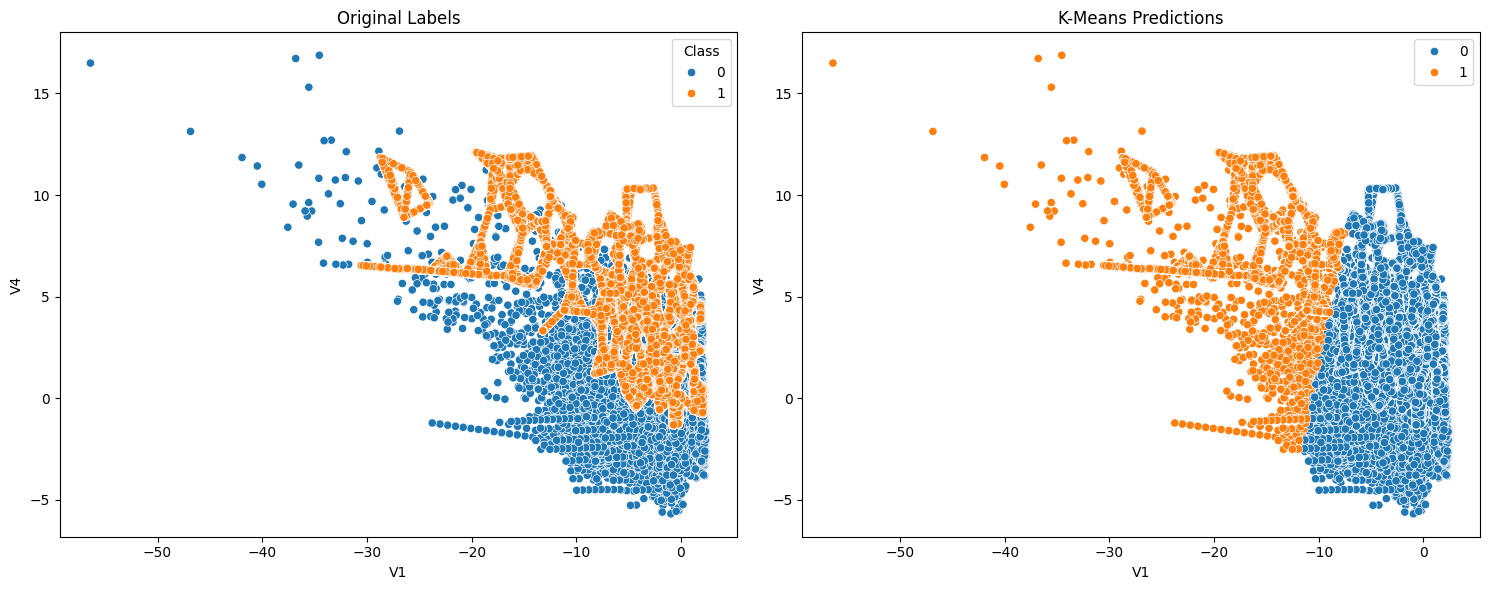

In [26]:
feature_pair = ['V1', 'V4']

X = df[feature_pair]
y = df[["Class"]]

print("Original Dataset:")
print(f'Original dataset shape: {y.value_counts()}')

# K-Means without SMOTE
kmeans = KMeans(n_clusters=2, max_iter=3000, n_init=20)
y_pred_kmeans_original = kmeans.fit_predict(X)

print("\nK-Means Clustering without SMOTE:")
print("Accuracy:", accuracy_score(y, y_pred_kmeans_original))
print(classification_report(y, y_pred_kmeans_original))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("\nAfter SMOTE:")
print(f'Resampled dataset shape: {y_res.value_counts()}')

# K-Means with SMOTE
kmeans_smote = KMeans(n_clusters=2, max_iter=3000, n_init=20)
y_pred_kmeans_smote = kmeans_smote.fit_predict(X_res)

print("\nK-Means Clustering with SMOTE:")
print("Accuracy:", accuracy_score(y_res, y_pred_kmeans_smote))
print(classification_report(y_res, y_pred_kmeans_smote))

# Scatter plots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x=X_res[feature_pair[0]], y=X_res[feature_pair[1]], hue=y_res.Class, ax=ax[0])
ax[0].set_title('Original Labels')
sns.scatterplot(x=X_res[feature_pair[0]], y=X_res[feature_pair[1]], hue=y_pred_kmeans_smote, ax=ax[1])
ax[1].set_title('K-Means Predictions')
plt.tight_layout()
plt.show()

### **Exercise 3.2: 3D scaterplot**

Select any three input features of the dataset to plot a 3d scatterplot of the points in 3D space. Use the "Class" column to color code the data points.

Perform K-means clustering on the three features that you selected above and plot again the 3d scatterplot but this time use the K-means cluster values for color coding.

You can use the template below to do this exercise.

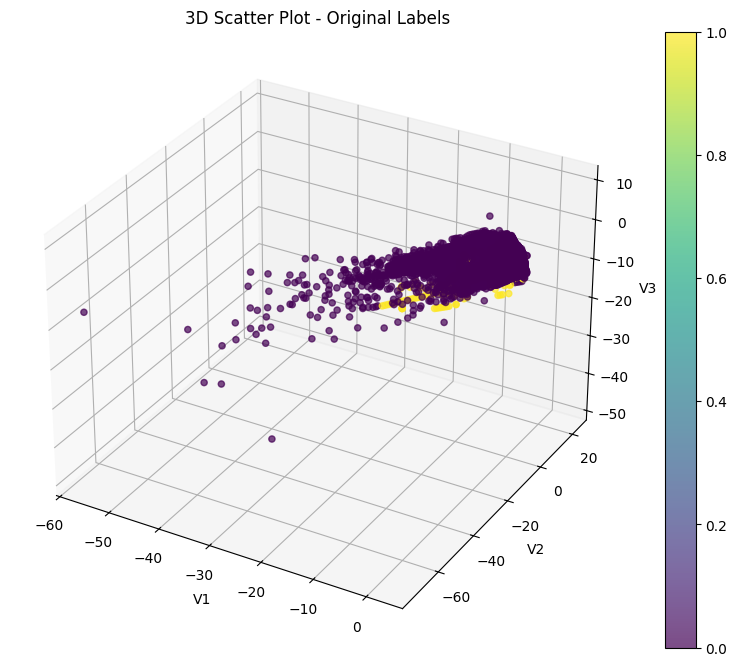

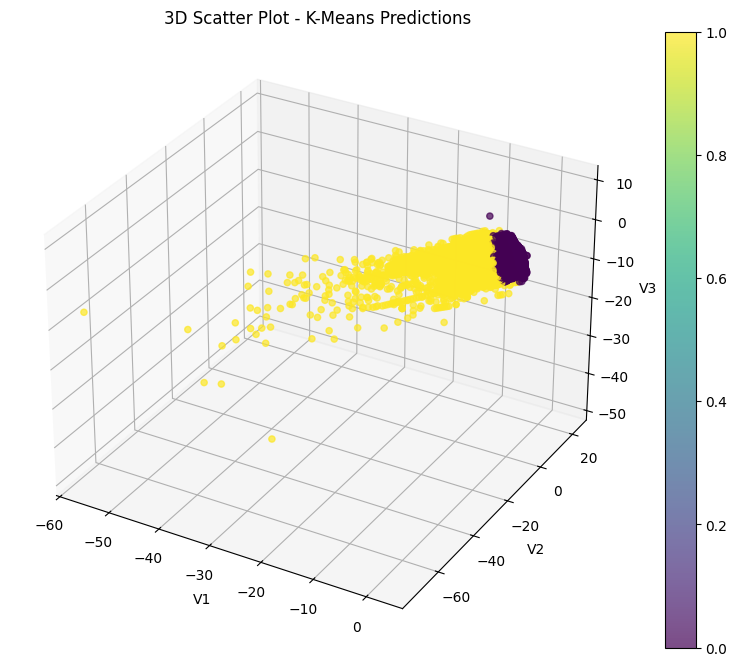

In [27]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap



features = ['V1', 'V2', 'V3']
X = df[features]
y = df.Class

# 3D Scatter with original labels
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], 
                        c=y, cmap='viridis', alpha=0.7)
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.set_title('3D Scatter Plot - Original Labels')
plt.colorbar(scatter)
plt.show()

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(X)

# 3D Scatter with K-Means predictions
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], 
                        c=y_pred, cmap='viridis', alpha=0.7)
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.set_title('3D Scatter Plot - K-Means Predictions')
plt.colorbar(scatter)
plt.show()

## Isolation Forest

Isolation Forest is an anomaly detection algorithm that uses a tree-based approach to identify outliers in a dataset. The algorithm works by randomly selecting a feature and a split value within the feature range to create a partition of the data. This process is repeated recursively to create a tree-like structure until all instances are isolated.

The number of splits required to isolate a given data point is considered to be a measure of its normality. An outlier is identified as an instance that requires fewer splits to be isolated, meaning it is less normal than other instances in the dataset. The algorithm can also be used to identify multiple outliers simultaneously.

One of the main advantages of Isolation Forest is that it is able to handle datasets with a high dimensionality and does not require prior knowledge of the data distribution. This makes it a useful tool in a wide range of applications, such as fraud detection, network intrusion detection, and anomaly detection in sensor data.

However, it is important to note that Isolation Forest is not perfect and may not be able to detect all anomalies in some datasets. It is also possible for the algorithm to be sensitive to certain parameters, such as the number of trees in the forest or the subsampling rate.

Overall, Isolation Forest is a powerful algorithm for identifying anomalies in large and complex datasets. Its ability to handle high-dimensional data and lack of assumptions about data distribution make it a useful tool for data scientists and analysts.

![image.gif](https://unit8.com/wp-content/uploads/2021/07/1_67DU32noLb5ZAYAD_YdfxA.gif)


In [28]:
def isf_preds_relabel(y_pred):
  y_pred[y_pred == 1] = 0
  y_pred[y_pred == -1] = 1
  return y_pred

Run Isolation Forest model using a subset of the dataset features

In [29]:
v1_to_v14_features = [f"V{i}" for i in range(1,14)]
X = df[v1_to_v14_features]
y = df.Class

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
dtypes: float64(13)
memory usage: 28.2 MB


Split the dataset into train/test 80%/20% respectively.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [31]:
ISF = IsolationForest(random_state=42, max_samples=1.0)
ISF.fit(X_train)

y_pred = ISF.predict(X_test)
y_pred = isf_preds_relabel(y_pred)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.22      0.54      0.31        97

    accuracy                           1.00     56962
   macro avg       0.61      0.77      0.65     56962
weighted avg       1.00      1.00      1.00     56962



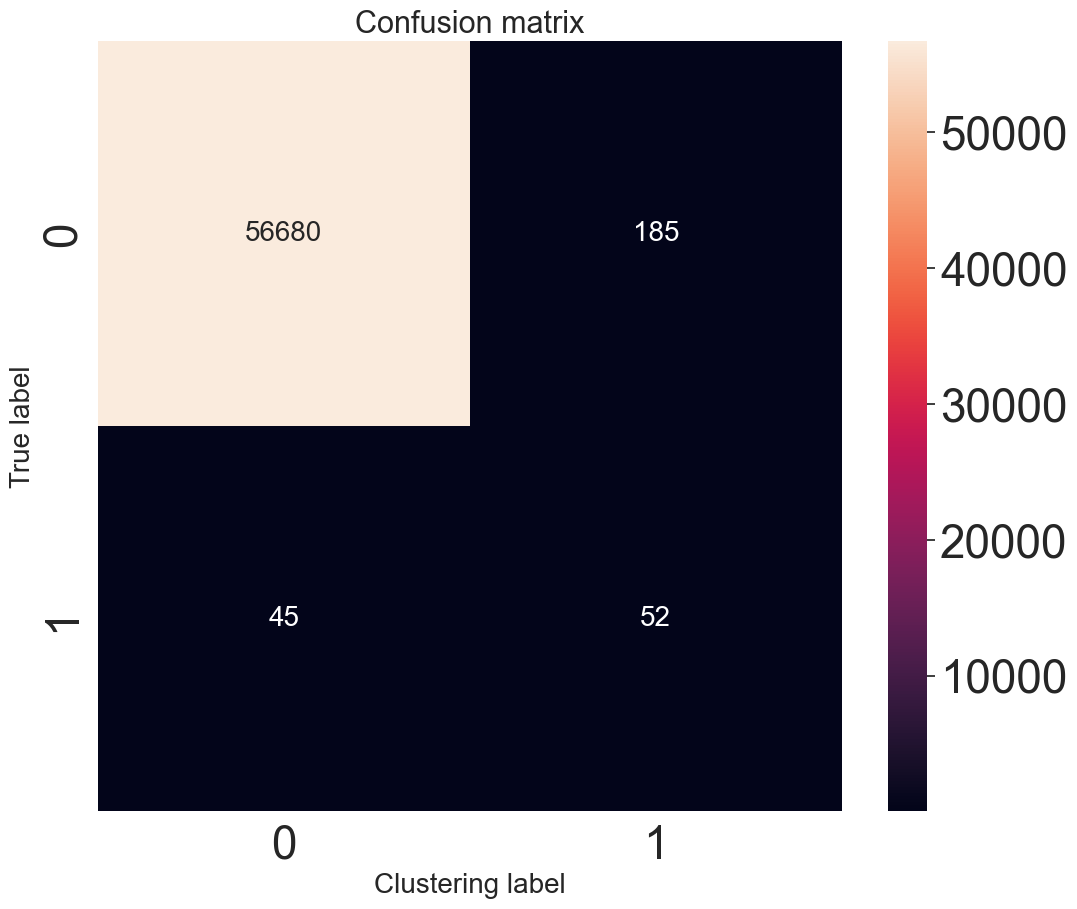

In [33]:
import sklearn

sns.set(font_scale=3)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Confusion matrix", fontsize=22)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Clustering label', fontsize=20)
plt.show()

### Exercise 3.3: Isolation Forest

Try to improve the overall performance of the model (pay attention on the macro avg accuracy. Re-run IsolationForest algorithm on a different subset of features and display the classification report and confusion matrix.


Feature Set: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13']
Unique values in y_test: [0 1]
Unique values in y_pred: [0 1]
Shape of y_test: (56962,)
Shape of y_pred: (56962,)
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56865
           1       0.02      0.92      0.03        97

    accuracy                           0.90     56962
   macro avg       0.51      0.91      0.49     56962
weighted avg       1.00      0.90      0.95     56962



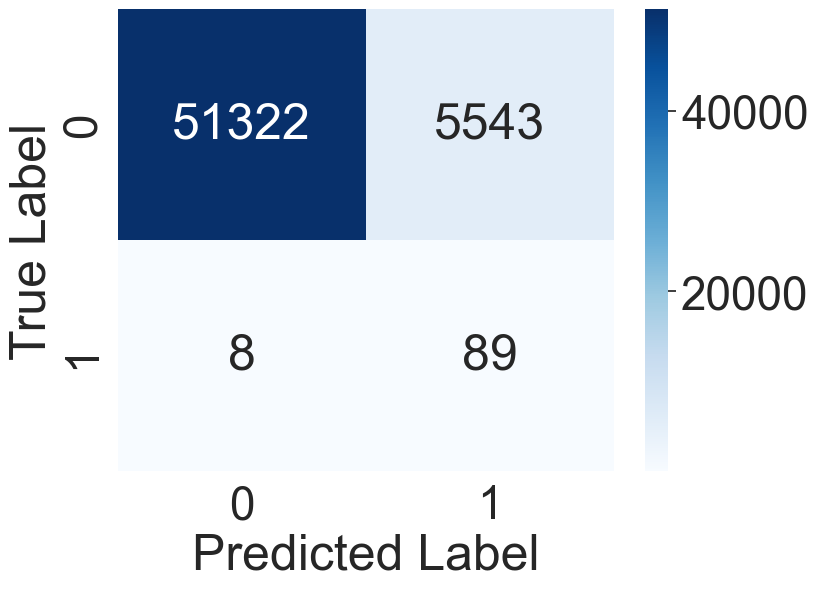


Feature Set: ['V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
Unique values in y_test: [0 1]
Unique values in y_pred: [0 1]
Shape of y_test: (56962,)
Shape of y_pred: (56962,)
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56865
           1       0.02      0.94      0.03        97

    accuracy                           0.90     56962
   macro avg       0.51      0.92      0.49     56962
weighted avg       1.00      0.90      0.95     56962



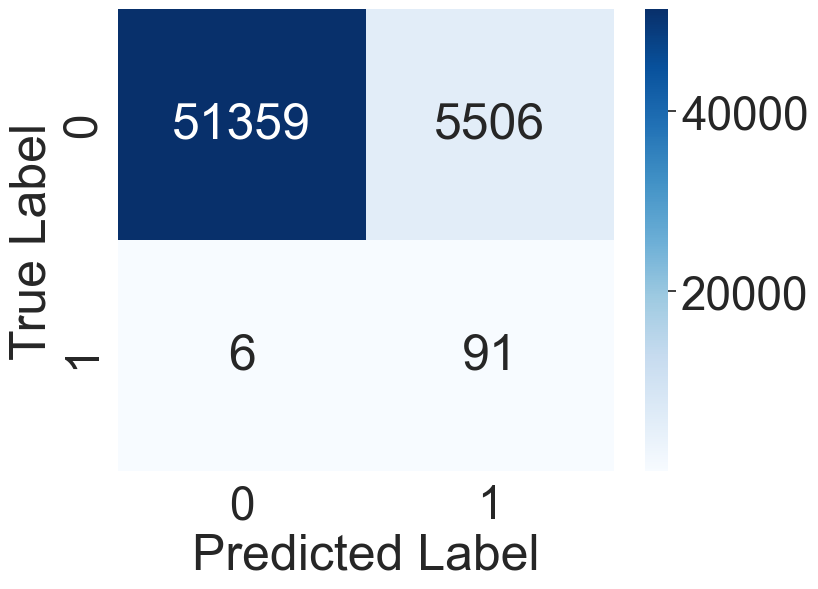


Feature Set: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8']
Unique values in y_test: [0 1]
Unique values in y_pred: [0 1]
Shape of y_test: (56962,)
Shape of y_pred: (56962,)
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56865
           1       0.02      0.89      0.03        97

    accuracy                           0.90     56962
   macro avg       0.51      0.89      0.49     56962
weighted avg       1.00      0.90      0.95     56962



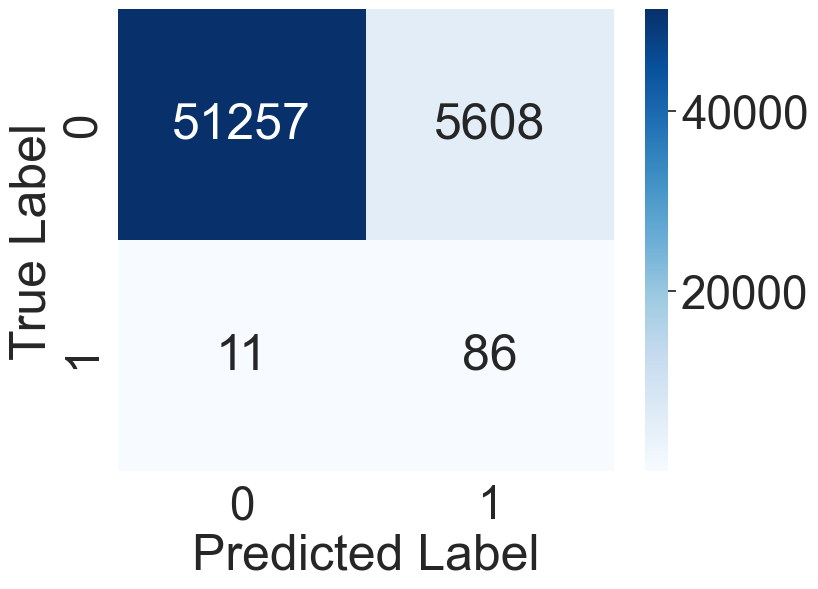

In [46]:
feature_sets = [
    [f"V{i}" for i in range(1, 14)],  # Original implementation
    [f"V{i}" for i in range(14, 29)],  # V15-V28
    ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8']  # Subset of early features
]

def isf_preds_relabel(y_pred):
    y_pred = np.copy(y_pred)
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    return y_pred

for feature_set in feature_sets:
    print(f"\nFeature Set: {feature_set}")
    X = df[feature_set].values
    y = df['Class'].values
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
    
    # Isolation Forest
    ISF = IsolationForest(random_state=42, max_samples=1.0, contamination=0.1)  # Added contamination parameter
    ISF.fit(X_train)
    
    y_pred = ISF.predict(X_test)
    y_pred = isf_preds_relabel(y_pred)
    
    # Debug print statements
    print("Unique values in y_test:", np.unique(y_test))
    print("Unique values in y_pred:", np.unique(y_pred))
    print("Shape of y_test:", y_test.shape)
    print("Shape of y_pred:", y_pred.shape)
    
    # Ensure y_test and y_pred are 1D arrays of the same shape
    y_test = y_test.ravel()
    y_pred = y_pred.ravel()
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()